In [1]:
import numpy as np

# Import the configuration file
from config.config import *
from src.TCP.tcp_utils import *
from src import main_utils
from src.BINVEC import binvec_utils

Using device: cuda:0 (from utils.py)
Device: cuda from tcp_utils
Repo dir: /home/idv-eqs8-pza/IDV_code/ClosedLoopProject from generate_electrode_info.py


### Test the generate_vec_file function referenceing a bin file that contains all of the images.

upload_electrode_data in TEST mode, values generated from config.py
Generating electrode info:
generate_electrode_info in TEST mode, values generated from config.py - Not saving to file
Generating electrode info:
TEST is on
   electrode_number: 53
   threshold_multiplier: 8
   RF_x_center: 54
   RF_y_center: 54
   RF_size: 15
   localker_smoothness: 15
   localker_amplitude: 0.10
   acosker_sigma_0: 0.10
-log2rho2 is 1.8501
Overwriting the directory /home/idv-eqs8-pza/IDV_code/ClosedLoopProject/src/TCP/data/session_1/vec_files - save_vec is in in TEST mode


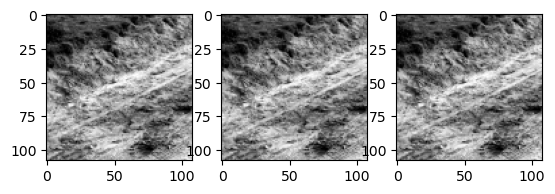

In [4]:
electrode_info = main_utils.upload_electrode_info( 
        electrode_info_path, print_info=True, testmode = testmode )

# Upload the natural image dataset
nat_img_tuple = main_utils.upload_natural_image_dataset( 
    dataset_path=img_dataset_path, astensor=False )

# Set up the start_model given the electrode information
start_model = main_utils.model_from_electrode_info( electrode_info, *nat_img_tuple )# dict of tensors

# Generate the vec file for the starting model
# bin_file = generate_bin_file( nat_img_tuple )

# - Generates a VEC file for the first 50 random images to show using the DMD
vec_file, vec_pathname = binvec_utils.generate_vec_file(
            active_img_ids = start_model['fit_parameters']['in_use_idx'],
            rndm_img_ids   = torch.empty(0),
            n_gray_trgs    = n_gray_trgs,
            n_img_trgs     = n_img_trgs,
            n_ending_gray_trgs = n_ending_gray_trgs,
            save_file=True,
            testmode=testmode ) 

binvec_utils.test_vec_img_correspondence( vec_pathname, nat_img_tuple,
                            idx_in_vec       = start_model['fit_parameters']['in_use_idx'], 
                            idx_to_compare   = 15, # which out of the 50 images to compare
                            show_images=True)
